In [10]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate

In [11]:
load_dotenv()

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [34]:
class ChainPrompt(TypedDict):

    topic: str
    outline: str
    blog: str
    score: int

In [35]:
def outline(state: ChainPrompt) -> ChainPrompt:

    topic = state["topic"]

    prompt = f"Generate a outline on this topic - {topic}"

    outline = llm.invoke(prompt).content

    state["outline"] = outline

    return state

In [36]:
def gen_blog(state: ChainPrompt) -> ChainPrompt:

    outline = state["outline"]

    prompt = f"Generate a detailed blog on the following outtile {outline}"

    blog = llm.invoke(prompt).content

    state["blog"] = blog

    return state

In [37]:
def evaulate(state: ChainPrompt) -> ChainPrompt:

    outline = state["outline"]
    blog = state["blog"]

    prompt = f"Based on my outline {outline}, rate my blog {blog} between 1 to 10. Only output the number."
    score = llm.invoke(prompt).content

    state["score"] = score
    return state

In [38]:
graph = StateGraph(ChainPrompt)

graph.add_node("create_outline",outline)
graph.add_node("gen_blog",gen_blog)
graph.add_node("evaulate",evaulate)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline","gen_blog")
graph.add_edge("gen_blog","evaulate")
graph.add_edge("evaulate",END)

workflow = graph.compile()

In [39]:
initial_state = {"topic":"Rise of AI in India"}

final_state = workflow.invoke(initial_state)

print(final_state)

{'topic': 'Rise of AI in India', 'outline': '## Rise of AI in India: Outline\n\n**I. Introduction**\n\n   *   A. Hook: Start with a compelling statistic or anecdote showcasing the growing impact of AI in India.\n   *   B. Background: Briefly define Artificial Intelligence (AI) and its significance in the 21st century.\n   *   C. Thesis Statement: Clearly state the main argument, e.g., "The rise of AI in India is driven by a confluence of factors, including government initiatives, a burgeoning tech talent pool, and growing demand across various sectors, presenting both significant opportunities and challenges for the nation."\n   *   D. Outline preview: Briefly mention the key areas to be covered in the essay.\n\n**II. Drivers of AI Adoption in India**\n\n   *   A. Government Initiatives and Policies\n        *   1.  National Strategy for Artificial Intelligence ("AI for All")\n        *   2.  Focus on research and development (R&D) funding and infrastructure.\n        *   3.  Promotion

In [42]:
print(final_state["outline"])

## Rise of AI in India: Outline

**I. Introduction**

   *   A. Hook: Start with a compelling statistic or anecdote showcasing the growing impact of AI in India.
   *   B. Background: Briefly define Artificial Intelligence (AI) and its significance in the 21st century.
   *   C. Thesis Statement: Clearly state the main argument, e.g., "The rise of AI in India is driven by a confluence of factors, including government initiatives, a burgeoning tech talent pool, and growing demand across various sectors, presenting both significant opportunities and challenges for the nation."
   *   D. Outline preview: Briefly mention the key areas to be covered in the essay.

**II. Drivers of AI Adoption in India**

   *   A. Government Initiatives and Policies
        *   1.  National Strategy for Artificial Intelligence ("AI for All")
        *   2.  Focus on research and development (R&D) funding and infrastructure.
        *   3.  Promotion of AI skills development and education.
        *   4.  Go

In [41]:
print(final_state["blog"])

## The Rise of AI in India: A Nation on the Cusp of Transformation

**I. Introduction**

*   **A. Hook:** Imagine a future where a farmer in rural Maharashtra uses AI-powered sensors to optimize irrigation, increasing crop yield by 30% and doubling their income. This isn't a distant dream; it's a rapidly approaching reality fueled by the burgeoning Artificial Intelligence (AI) revolution in India.
*   **B. Background:** Artificial Intelligence, the ability of computer systems to perform tasks that typically require human intelligence, is rapidly transforming industries worldwide. From self-driving cars to personalized medicine, AI is poised to reshape our lives in profound ways.
*   **C. Thesis Statement:** The rise of AI in India is driven by a confluence of factors, including proactive government initiatives, a burgeoning tech talent pool, and growing demand across various sectors, presenting both significant opportunities and challenges for the nation as it aims to leverage this tec

In [44]:
print(final_state["score"])

9


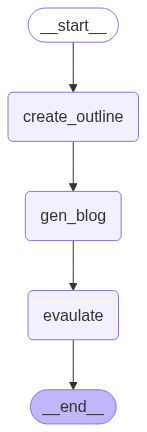

In [24]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())